## Exercise

In [751]:
import numpy as np
import pandas as pd
from sklearn import gaussian_process
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')

**Load the national COVID dataset and solve the exercise using `scikit-learn` library.**

In [788]:
data = pd.read_csv("homework_05_COVID_national_20200421.csv", index_col=0, usecols=range(1,10))
# convert index to datetime64 data type
data.index = pd.to_datetime(data.index)
data.head()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined
date,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94
2020-02-25,10,8623,35,114,93,322,1,162
2020-02-26,12,9587,36,128,78,400,3,221
2020-02-27,17,12014,56,248,250,650,45,284
2020-02-28,21,15695,64,345,238,888,46,412


In [789]:
def calculate_daily(column):
    """This function calculates adn returns daily values from cumulative column """
    
    cumulative = data[column].values
    daily = np.array([(cumulative[i+1]-cumulative[i]) for i in range(len(data[column])-1)])
    daily = np.insert(daily,0,cumulative[0])
    return daily

daily_swabs = calculate_daily("swabs")
daily_deaths = calculate_daily("deaths")

In [790]:
def plot_wdate(column, array=None, label=None):
    
    """ 
    This function plot date,given column name from data 
    with the blue vertical line from 2020-04-15 with specified label or given array.
    You can use this function either giving array or column name of
    dataframe, please ensure that you give None for other option, default
    array is none.
    """
    
    if column != None:
        plt.figure(figsize=(10,7))
        plt.title("Number of "+label+" with Date")
        plt.xlabel("Date")
        plt.ylabel("Number of "+label)
        plt.plot(data.index,data[column])
        plt.axvline(pd.to_datetime("2020-04-15"), linestyle='--', color='b')
    else:
        plt.figure(figsize=(10,7))
        plt.title("Number of "+label+" with Date")
        plt.xlabel("Date")
        plt.ylabel("Number of"+label)
        plt.plot(data.index,array)
        plt.axvline(pd.to_datetime("2020-04-15"), linestyle='--', color='b')

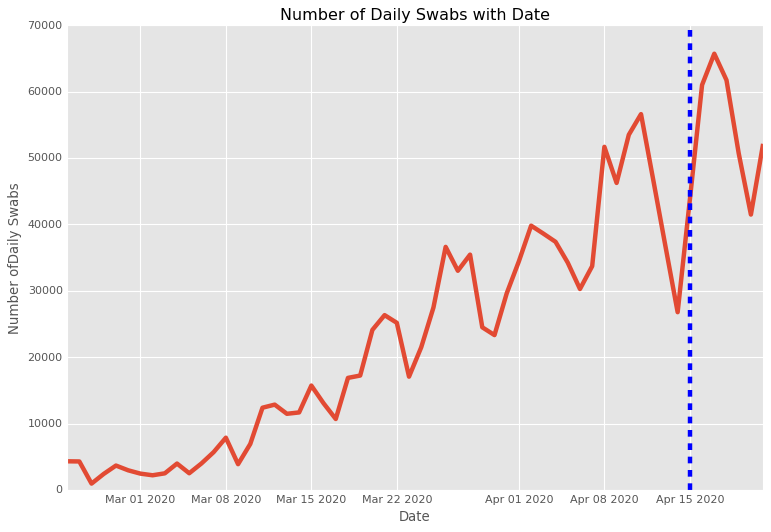

In [791]:
plot_wdate(column=None, array=daily_swabs, label = "Daily Swabs")

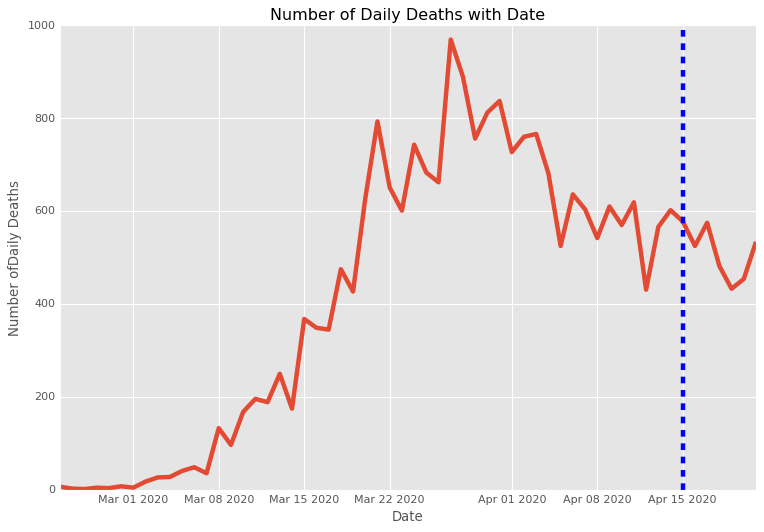

In [792]:
plot_wdate(column=None, array=daily_deaths, label = "Daily Deaths")

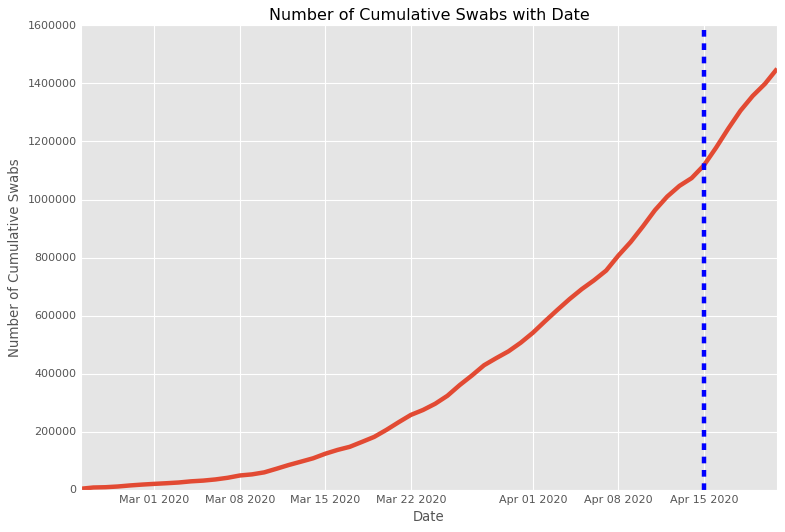

In [793]:
plot_wdate(column = "swabs", label = "Cumulative Swabs")

**1. Perform a train-test split, with observations from the last week corresponding to the test set;**

In [794]:
# Perform a train-test split, with observations from the last week corresponding to the test set;
sep_idx = data.index.searchsorted(pd.to_datetime("2020-04-15"))
data_early = data.iloc[:sep_idx]
data_late = data.iloc[sep_idx:]
#data_early
#data_late

In [795]:
def dates_to_idx(timelist):
    
    """Given the date time array converted to scalar values
    by substracting the first date and dividing the week"""
    
    reference_time = pd.to_datetime("2020-02-24")
    t = (timelist - reference_time) / np.timedelta64(1, 'W')
    return np.asarray(t)

def normalize(column):
    
    """Normalizing the given column by substracting the first element
    and dividing it to standard deviation"""
    
    first = column[0]
    std = np.std(column)
    return (column-first)/ std

In [800]:
data['Rescaled_Date'] = dates_to_idx(data.index)
data['Daily_swabs_normalized'] = normalize(daily_swabs)
data['Daily_deaths_normalized'] = normalize(daily_deaths)
data['Deaths_normalized'] = normalize(data['deaths'])
data['Swabs_normalized'] = normalize(data['swabs'])

data.head()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,Rescaled_Date,Daily_swabs_normalized,Daily_deaths_normalized,Deaths_normalized,Swabs_normalized
date,,,,,,,,,,,,,
2020-02-24,7,4324,26,101,221,229,1,94,0.000000,0.000000,0.000000,0.000000,0.000000
2020-02-25,10,8623,35,114,93,322,1,162,0.142857,-0.001359,-0.013963,0.000350,0.009761
2020-02-26,12,9587,36,128,78,400,3,221,0.285714,-0.182653,-0.017454,0.000583,0.011950
2020-02-27,17,12014,56,248,250,650,45,284,0.428571,-0.103123,-0.006982,0.001166,0.017461
2020-02-28,21,15695,64,345,238,888,46,412,0.571429,-0.034954,-0.010473,0.001633,0.025819


In [801]:
data.tail()

,deaths,swabs,ICU,hospitalized,new_infections,cumulative_infections,recovered,quarantined,Rescaled_Date,Daily_swabs_normalized,Daily_deaths_normalized,Deaths_normalized,Swabs_normalized
date,,,,,,,,,,,,,
2020-04-17,22745,1244108,2812,25786,3493,172434,42727,78364,7.571429,3.336731,1.982795,2.652017,2.815004
2020-04-18,23227,1305833,2733,25007,3491,175925,44927,80031,7.714286,3.120375,1.658147,2.708234,2.955155
2020-04-19,23660,1356541,2635,25033,3047,178972,47055,80589,7.857143,2.521480,1.487096,2.758737,3.070290
2020-04-20,24114,1398024,2573,24906,2256,181228,48877,80758,8.000000,2.020000,1.560404,2.811689,3.164480
2020-04-21,24648,1450150,2471,24134,2729,183957,51600,81104,8.142857,2.598564,1.839670,2.873971,3.282835


In [802]:
def train_test_split(X, y):
    """Given column name train test split performed with observations 
    from the last week target variable depend on given column whether 
    train set is always bla bla (this part will b modified)"""
    
    X = data[X].values[:,None]  ## for now I have always dates as X
    y = data[y].values
    X_train = X[:len(data_early)]
    y_train = y[:len(data_early)]
    X_test = X[len(data_early):]
    y_test = y[len(data_early):]
    
    return X, y, X_train, X_test, y_train, y_test

In [803]:
# Train test split for daily number of daily_deaths
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="Daily_deaths_normalized")

**2. Build a suitable combination of kernels choosing from the ones shown in `notebook_05`;**

In [804]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, RationalQuadratic,WhiteKernel
from sklearn.gaussian_process.kernels import  DotProduct, Matern, ConstantKernel

In [770]:
kernel1 = 100**3 * RBF(length_scale=100.0) # Long term trend
kernel2 = kernel1 + 0.1**2 * RBF(length_scale=0.1) \
        + WhiteKernel(noise_level=0.1**2,
                  noise_level_bounds=(1e-3, 1e9))  # noise terms
kernel3 = kernel1+ 20 * RBF(length_scale=100.0) \
        * ExpSineSquared(length_scale=12.0, periodicity=1.0,
                     periodicity_bounds="fixed")  # seasonal component

kernel4 = kernel2 + kernel3

**Consider first the column corresponding to the (cumulative) number of deaths.**

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [825]:
def plot_predictions(gp, X:np.array, y:np.array, include_observed=True):

    pred_y, pred_std = gp.predict(X, return_std=True)
    plt.figure(figsize=(10, 7))
    if include_observed:
        plt.plot(X, y, 'ok', alpha = .1, label = "Observed")
    plt.plot(X, pred_y, label = "Predicted")
    plt.fill_between(X[:,0],
                    pred_y + pred_std,
                    pred_y - pred_std,
                    color = "b", alpha = 0.3)

    if np.allclose(X[:, 0], X):
        plt.axvline(dates_to_idx(pd.to_datetime("2020-04-15")), linestyle='--', color='g')
    else:
        plt.axvline(dates_to_idx(pd.to_datetime("2020-04-15")), linestyle='--', color='g')
    plt.legend(loc='upper left')

Text(0.5, 1.0, 'Daily Death Observed and Predicted')

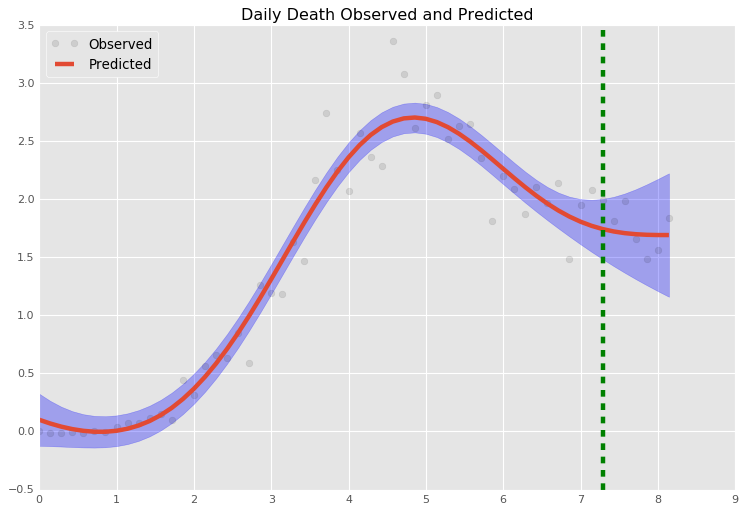

In [826]:
# Train test split for daily number of daily_deaths
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="Daily_deaths_normalized")

gp = GaussianProcessRegressor(kernel=kernel1, alpha=0.2,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp.fit(X_train, y_train)
plot_predictions(gp,X,y)
plt.title("Daily Death Observed and Predicted")

Text(0.5, 1.0, 'Cumulative Death Observed and Predicted')

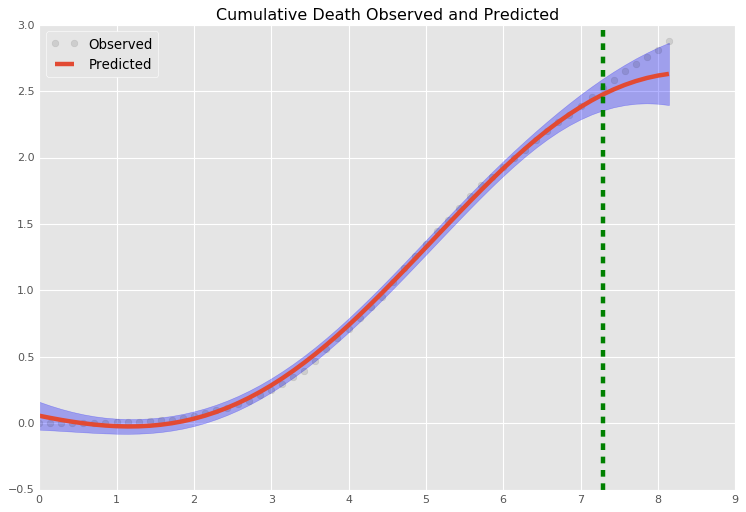

In [827]:
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="Deaths_normalized")

gp = GaussianProcessRegressor(kernel=kernel1, alpha=0.05,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp.fit(X_train, y_train)
plot_predictions(gp,X,y)
plt.title("Cumulative Death Observed and Predicted")

**3. Fit a `GaussianProcessRegressor` to predict the daily number of swabs, plot future predictions and compare them to real test data;**

Text(0.5, 1.0, 'Daily Swabs Observed and Predicted')

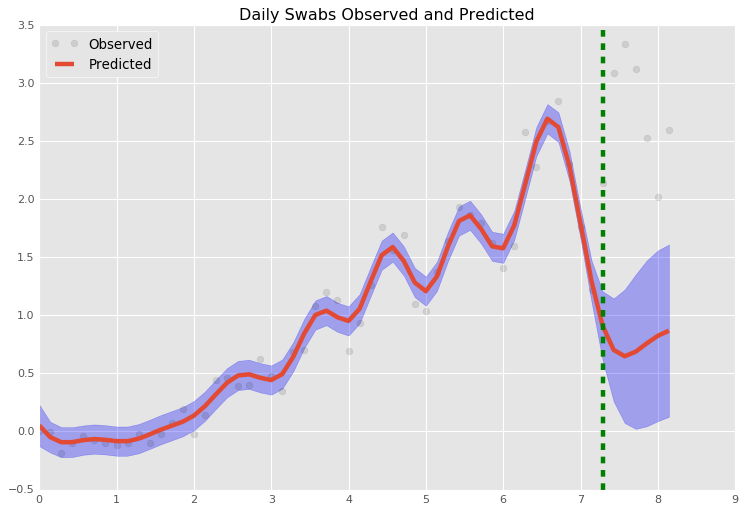

In [829]:
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="Daily_swabs_normalized")

gp = GaussianProcessRegressor(kernel=kernel1, alpha=0.05,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp.fit(X_train, y_train)
plot_predictions(gp,X,y)
plt.title("Daily Swabs Observed and Predicted")

Text(0.5, 1.0, 'Cumulative Swabs Observed and Predicted')

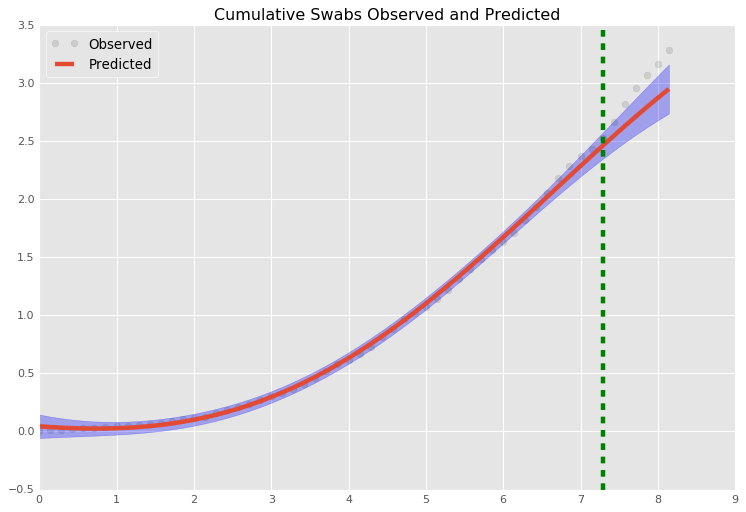

In [830]:
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="Swabs_normalized")

gp = GaussianProcessRegressor(kernel=kernel1, alpha=0.05,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp.fit(X_train, y_train)
plot_predictions(gp,X,y)
plt.title("Cumulative Swabs Observed and Predicted")

**4. Repeat points 1-3 on the daily number of swabs, which can be computed from the cumulative number provided in the dataset.**

**You are welcome to try out and fit other data streams in the dataset.**


Text(0.5, 1.0, 'Cumulative Swabs Observed and Predicted')

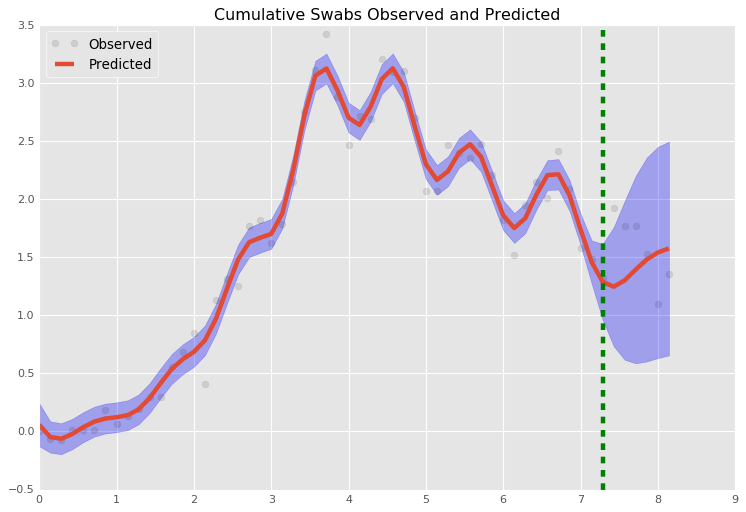

In [837]:
data["infection_normalized"] = normalize(data["new_infections"])
X, y, X_train, X_test, y_train, y_test = train_test_split(X="Rescaled_Date",y="infection_normalized")

gp = GaussianProcessRegressor(kernel=kernel1, alpha=0.05,
                               normalize_y=True,
                               n_restarts_optimizer=3)
gp.fit(X_train, y_train)
plot_predictions(gp,X,y)
plt.title("Cumulative Swabs Observed and Predicted")